#                <div align="center">Exercices sur l'apprentissage non supervisé


##                     <div align="center">MOISE EHIMIGAYE SENGHOR

## <div align="center">*UE : Manipulation et Prétraitement de données*

In [1]:
# une meilleure exploitation du notebook nous donnons la possibilité d'enlever les messages d'erreur en eliminant les signes '#' dans le code ci-dessous.
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from skimpy import skim
import prince



## Projet 1:  Réduction de dimensionnalité

1.1 - Importer le jeu de données iris :

In [3]:
iris = load_iris()
#transformer iris en dataframe
Iris= pd.DataFrame(data=iris.data, columns=iris.feature_names)
Iris['especes'] = iris.target #prise en compte des especes de fleurs dans le dataframe
Iris['nom_especes']= iris.target_names[iris.target]# implementation de leurs noms

In [4]:
Iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   especes nom_especes  
0        0      setosa  
1        0      setosa  
2        0      setosa  
3        0      setosa  
4        0      setosa

In [5]:
Iris.shape

(150, 6)

In [6]:
Iris.groupby('nom_especes').size()

nom_especes
setosa        50
versicolor    50
virginica     50
dtype: int64

1.2 - représentation du jeu de données en trois dimensions :

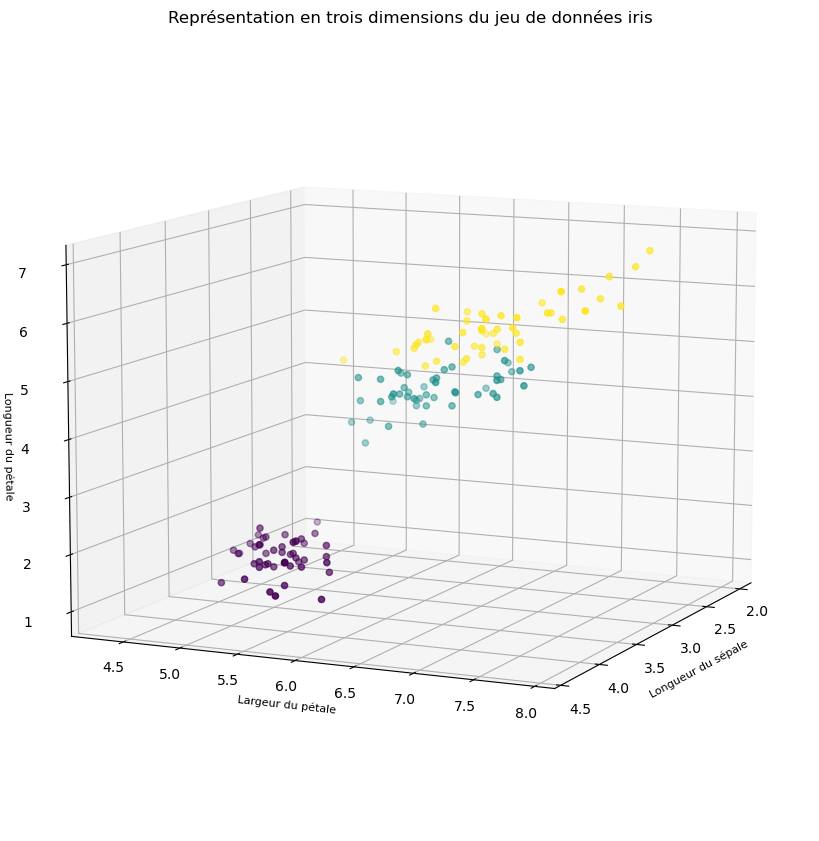

In [7]:
fig = plt.figure(figsize=(10,11)) #implementation de la figure 

#Mise en place du format du graphique en 3D
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
#implementons le nuage de points en trois d
scatter = ax.scatter(Iris.iloc[:, 1], Iris.iloc[:, 0], Iris.iloc[:, 2], c=Iris['especes'], cmap='viridis', marker='o')
ax.view_init(elev=10, azim =25)  # Ajustement pour un bon angle
#customiser le graphique 
ax.set_xlabel('Longueur du sépale', fontsize =8)
ax.set_ylabel('Largeur du pétale', fontsize=8)
ax.set_zlabel('Longueur du pétale', fontsize=8)
ax.zaxis.label.set_rotation(90)  # Rotation de l'étiquette Z
ax.zaxis.set_tick_params(pad=10)  # Ajustement de l'espace autour des ticks
plt.title ('Représentation en trois dimensions du jeu de données iris')
plt.show()

2.1 centrer et reduire les variables précitées

In [8]:
scaler = StandardScaler()#instance de normalisation 
Iris_standardise = scaler.fit_transform(Iris.iloc[:,0:5])#centree et reduire les variables
IRIS_ST = pd.DataFrame(Iris_standardise, columns=Iris.columns[0:5])#transformer en dataframe 
IRIS_ST['nom_especes']= iris.target_names[iris.target]# implementation du nom des fleurs
IRIS_ST.tail()#verification

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145           1.038005         -0.131979           0.819596          1.448832   
146           0.553333         -1.282963           0.705921          0.922303   
147           0.795669         -0.131979           0.819596          1.053935   
148           0.432165          0.788808           0.933271          1.448832   
149           0.068662         -0.131979           0.762758          0.790671   

      especes nom_especes  
145  1.224745   virginica  
146  1.224745   virginica  
147  1.224745   virginica  
148  1.224745   virginica  
149  1.224745   virginica

2.2 - Reproduire le meme grapique avec les données standardisées :

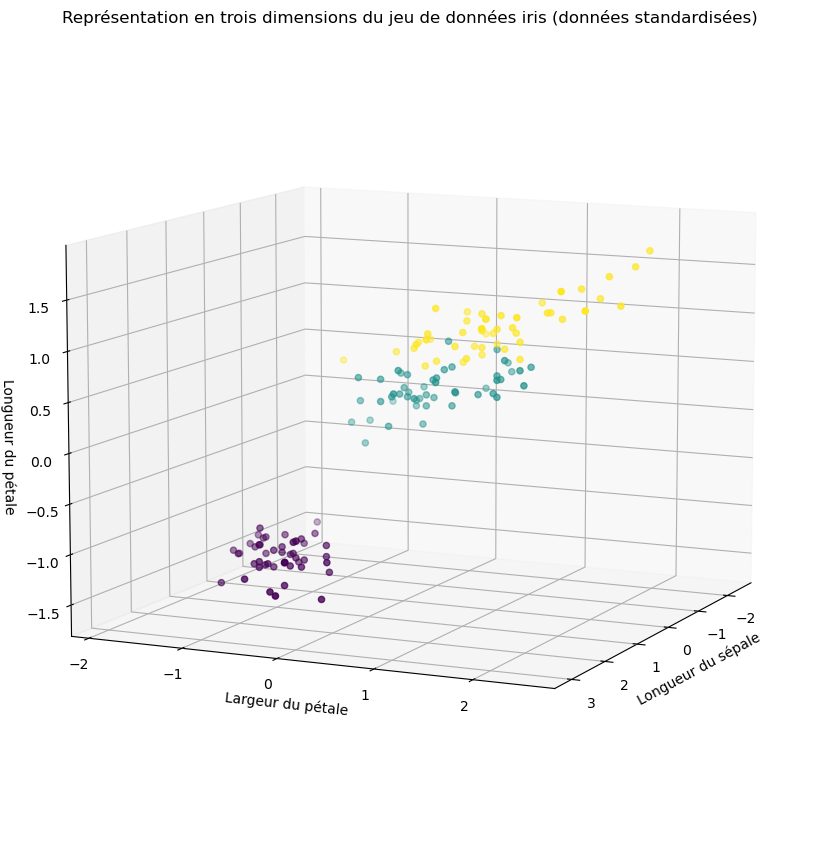

In [9]:
fig = plt.figure(figsize=(10,11))#reprise du graphique précédent en tenant compte du nouveau dataframe 


ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

scatter = ax.scatter(IRIS_ST.iloc[:, 1], IRIS_ST.iloc[:, 0], IRIS_ST.iloc[:, 2], c=IRIS_ST['especes'], cmap='viridis', marker='o')
ax.view_init(elev=10, azim =25)  # Ajustement pour un bon angle

ax.set_xlabel('Longueur du sépale')
ax.set_ylabel('Largeur du pétale')
ax.set_zlabel('Longueur du pétale')

plt.title ('Représentation en trois dimensions du jeu de données iris (données standardisées)')


plt.show()

3. Réaliser une ACP avec le jeu de données IRIS :

- sans standardisation : 

In [10]:
#Modele sans standardisation 
X = Iris.iloc[:,0:4] #données
Y = Iris.iloc[:,5]#resultat"
model = PCA(n_components = 2) #iteration du modele PCA avec deux composantes principales 
X_mod = model.fit_transform(X)# nous fittons et transformons les données du modele


In [11]:
# visualisation
#Creeons le dataframe necessaire pour les visualisations
Model = pd.DataFrame(X_mod,columns=['composante 1', 'composante 2'] )#le cCP
Model['especes']= Y#la target
Model

composante 1  composante 2    especes
0       -2.684126      0.319397     setosa
1       -2.714142     -0.177001     setosa
2       -2.888991     -0.144949     setosa
3       -2.745343     -0.318299     setosa
4       -2.728717      0.326755     setosa
..            ...           ...        ...
145      1.944110      0.187532  virginica
146      1.527167     -0.375317  virginica
147      1.764346      0.078859  virginica
148      1.900942      0.116628  virginica
149      1.390189     -0.282661  virginica

[150 rows x 3 columns]

In [12]:
#Visualisation
fig = px.scatter(Model, 
                 x='composante 1', 
                 y='composante 2', 
                 color='especes', # Colorer selon l'espèce d'Iris
                 title='Analyse en composantes principales du jeu de données Iris (2 composantes)',
                 )
fig.show()

- Avec standardisation :

In [13]:
model_standardise = PCA(n_components=2)#Modele créer
scaler = StandardScaler() #iteration pour standardiser les données
X_standard = scaler.fit_transform(X) #standardisation des données 
X_Standard = model_standardise.fit_transform(X_standard)# fittons le modeles

In [14]:
# visualisation
#Creeons le dataframe necessaire pour les viz
Model_standardise = pd.DataFrame(X_Standard,columns=['composante 1', 'composante 2'] )
Model_standardise['especes']= Y
Model_standardise

composante 1  composante 2    especes
0       -2.264703      0.480027     setosa
1       -2.080961     -0.674134     setosa
2       -2.364229     -0.341908     setosa
3       -2.299384     -0.597395     setosa
4       -2.389842      0.646835     setosa
..            ...           ...        ...
145      1.870503      0.386966  virginica
146      1.564580     -0.896687  virginica
147      1.521170      0.269069  virginica
148      1.372788      1.011254  virginica
149      0.960656     -0.024332  virginica

[150 rows x 3 columns]

In [15]:
fig = px.scatter(Model_standardise, 
                 x='composante 1', 
                 y='composante 2', 
                 color='especes', # Colorer selon l'espèce d'Iris
                 title='Analyse en composantes principales du jeu de données standardiséIris (2 composantes)'
                 )
fig.show()

4 - Vusualisation de la correlation entre les differentes variables du dataset iris :

In [16]:
#Matrice de correlation et representation :
Iris.iloc[:,0:4].corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000

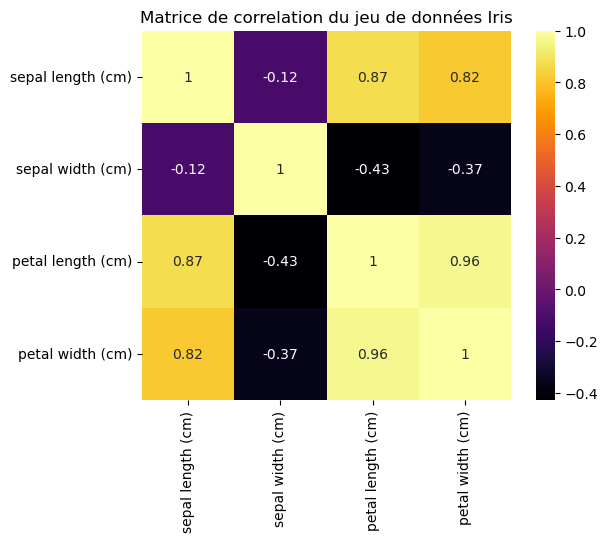

In [17]:
# faisons une carte thermique pour une meilleur visisbilité 
sns.heatmap(Iris.iloc[:,0:4].corr(), annot = True, cmap = 'inferno', square = True)
plt.title('Matrice de correlation du jeu de données Iris')
plt.show()

In [18]:
# Essayons de faire un visualisation avec ploty de la correlation des variables via un diagramme à bulles 
# commencons par transformer la matrice de corrélation par un format adéquat :
d = Iris.iloc[:,0:4].corr().reset_index().melt(id_vars='index')
d.columns = ['variable1', 'variable2', "correlation"]
d

variable1          variable2  correlation
0   sepal length (cm)  sepal length (cm)     1.000000
1    sepal width (cm)  sepal length (cm)    -0.117570
2   petal length (cm)  sepal length (cm)     0.871754
3    petal width (cm)  sepal length (cm)     0.817941
4   sepal length (cm)   sepal width (cm)    -0.117570
5    sepal width (cm)   sepal width (cm)     1.000000
6   petal length (cm)   sepal width (cm)    -0.428440
7    petal width (cm)   sepal width (cm)    -0.366126
8   sepal length (cm)  petal length (cm)     0.871754
9    sepal width (cm)  petal length (cm)    -0.428440
10  petal length (cm)  petal length (cm)     1.000000
11   petal width (cm)  petal length (cm)     0.962865
12  sepal length (cm)   petal width (cm)     0.817941
13   sepal width (cm)   petal width (cm)    -0.366126
14  petal length (cm)   petal width (cm)     0.962865
15   petal width (cm)   petal width (cm)     1.000000

In [19]:
 #utilisons le dataset créé pour la visualisation:
#Modifions le la variable correlation qui a des données négatives incompatibles avec la cateristique size primondiale pour les diagrammes à bulles
d['bulles']= np.abs(d['correlation'])* 100 #pour la taille des bulles
bubble = px.scatter(
    d,
    x='variable1',
    y='variable2',
    size='bulles',
    color='correlation',#couleurs tenant compte des valeurs négatives
    hover_name='correlation',
    title='Bubble charts matrice de correlation IRIS',
    color_continuous_scale=px.colors.sequential.Viridis
)
bubble.show()

5 - Representez un cercle de correlation 

In [20]:
#Commencons par regler le probleme de la variance totale expliquée
var_explique = model_standardise.explained_variance_ratio_ * 100
print('le pourcentage de la variance totale expliqué par le PC1 est de :', round(var_explique[0], 1),"%")
print('le pourcentage de la variance totale expliqué par le PC1 est de :', round(var_explique[1], 1),"%")
print(" A elles deux les deux composantes principales expliquent la variance avec un pourcentage égal a ",  round(var_explique[0] + var_explique[1], 2),"%")


le pourcentage de la variance totale expliqué par le PC1 est de : 73.0 %
le pourcentage de la variance totale expliqué par le PC1 est de : 22.9 %
 A elles deux les deux composantes principales expliquent la variance avec un pourcentage égal a  95.81 %


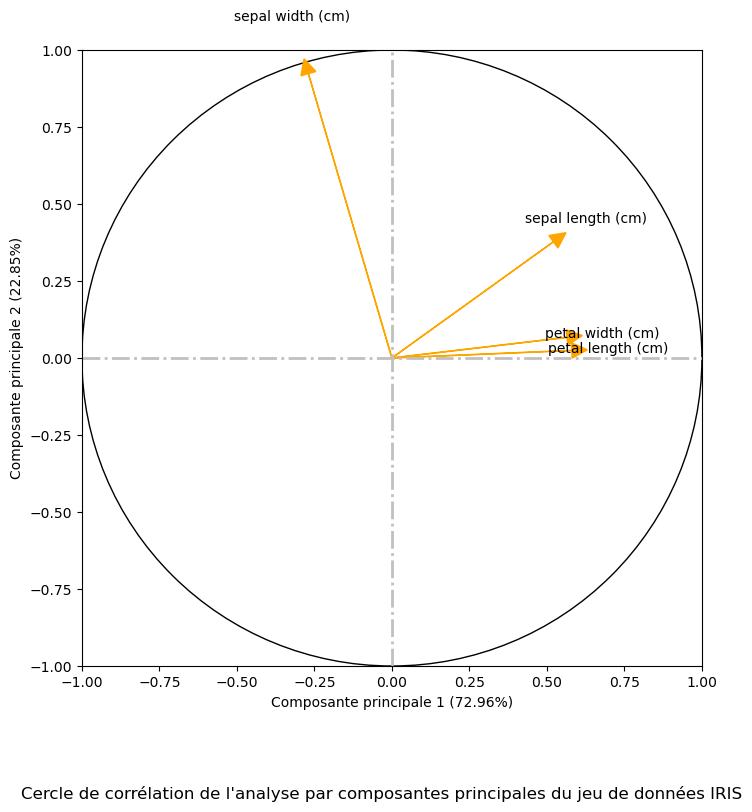

In [21]:
#creation du cercle trigonometrique qui abritera le cercle de correlations
fig, axes = plt.subplots(figsize=(8,8))
#Circonscrire les axes de -1 à 1
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#tracer les axes d'abcisses et d'ordonnées
plt.plot([-1,1],[0,0],color='silver',linestyle='-.',linewidth=2)
plt.plot([0,0],[-1,1],color='silver',linestyle='-.',linewidth=2)
#ajouter un cercle
cercle = plt.Circle((0,0),1,fill=False)
axes.add_artist(cercle)
# Nous creeons la boucle necessaire pour faire les etoiles
data = Iris.iloc[:,0:4] 
for i, (name, vector) in enumerate(zip(data.columns, model_standardise .components_.T)):
    plt.arrow(0, 0, vector[0], vector[1], head_width=0.05, head_length=0.05, color='orange')
    plt.text(vector[0] * 1.2, vector[1] * 1.2, name, color='black', ha='center', va='center')

plt.xlabel(f'Composante principale 1 ({round(var_explique[0] , 2)}%)')
plt.ylabel(f'Composante principale 2 ({round(var_explique[1] , 2)}%)')
plt.figtext(0.5, -0.05, "Cercle de corrélation de l'analyse par composantes principales du jeu de données IRIS", ha='center', va='center', fontsize=12)
plt.show()

Pour commencer on voit une taux de variance expliquée des deux composantes principales de plus de 95%. Par ailleurs on remarque que la variable sepal widht est fortement correlée à la composante principale 2. Les deux variables petal lenght petal width sont tres fortement correlées entre elles  et correlées de manière moins significative avec la composante 1 . La correlation entre les composantes principales et les variables est definie par l'orientation des vecteurs et la force de la correlation par l'eloignement de ceux ci avec le centre du cercle trigonometrique . La correlation entre les variables est definie par la faible difference entre leurs pentes et le rapporchement entre les fleches.

6- Representation de la biplot qui allie les vecteurs des variables dans le cercle de correlation ainsi que les representations des differentes fleurs.

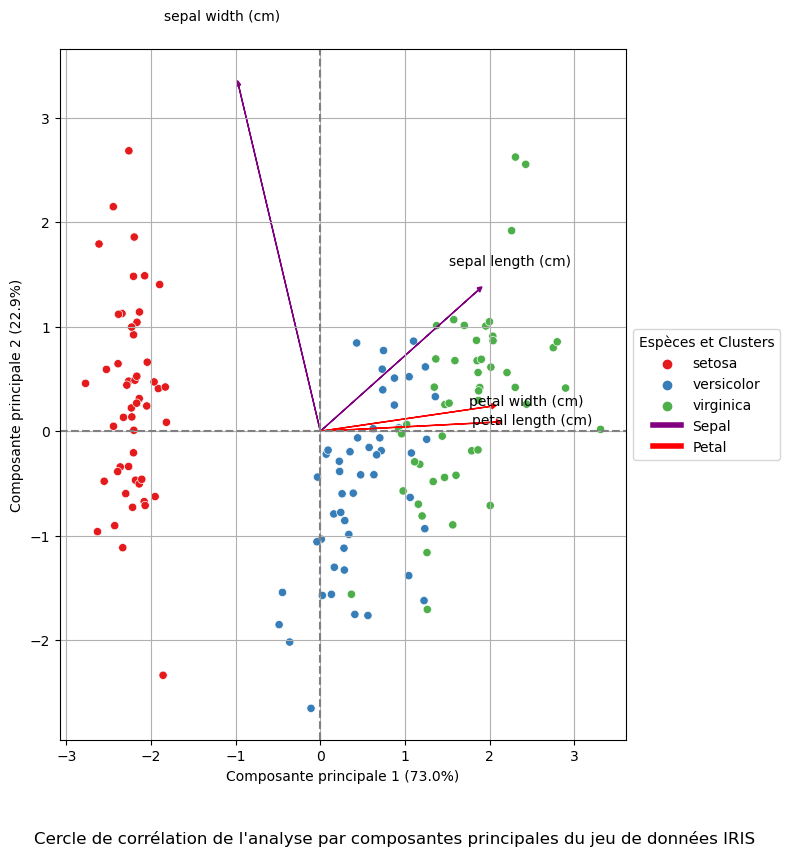

In [22]:
#Reprenons le code precedant en incluant le graphique de la base de données iris standardisé
fig, axes = plt.subplots(figsize=(8,8))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
scatter = sns.scatterplot(x='composante 1', y='composante 2', data=Model_standardise, palette='Set1', hue = 'especes', legend ='full' )#graphique des points de concernant le jeu de données iris

plt.grid(True)#demandé par le sujet

normal_vector = np.max(X_Standard) / np.max(model_standardise.components_)#normalisation des vecteurs pour les adapter au biplot

# Nous creeons les vecteurs des variables du jeu de données iris 
data = Iris.iloc[:,0:4] 

for i, (name, vector) in enumerate(zip(iris.feature_names, model_standardise.components_.T)):
# Mettre en formes les vecteur en couleur en fonction du la division sepal-petal   
    color = 'purple' if 'sepal' in name else 'red' #sepal en violet et petal en rouge
    plt.arrow(0, 0, vector[0]* normal_vector, vector[1]* normal_vector, head_width=0.05, head_length=0.05, color=color)
    plt.text(vector[0]* normal_vector * 1.2, vector[1]* normal_vector * 1.2, name, color='black', ha='center', va='center')

# travailler sur les legendes des especes des deux clusters petal et sepal 
handles, labels = scatter.get_legend_handles_labels()
# Ajouter les clusters pour les vecteurs
handles.append(plt.Line2D([0], [0], color='purple', lw=4, label='Sepal'))
handles.append(plt.Line2D([0], [0], color='red', lw=4, label='Petal'))

plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Espèces et Clusters')

plt.xlabel(f'Composante principale 1 ({round(var_explique[0] , 1)}%)')
plt.ylabel(f'Composante principale 2 ({round(var_explique[1] , 1)}%)')
plt.figtext(0.5, -0.05, "Cercle de corrélation de l'analyse par composantes principales du jeu de données IRIS", ha='center', va='center', fontsize=12)

plt.tight_layout()  # Ajuster la mise en page

plt.show()

7- Determination du nombre de dimensions pertinentes :

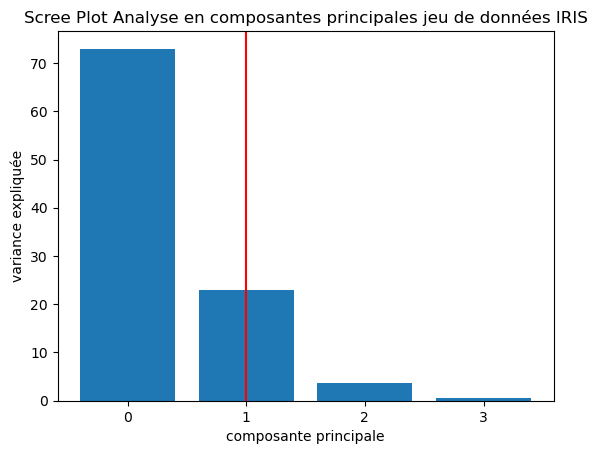

In [23]:
X = Iris.iloc[:, 0:4]
X_standard =StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X_standard)
features = range(pca.n_components_)
#visualisation
plt.bar(features, pca.explained_variance_ratio_ * 100 )
plt.axvline(x=1, color='r', linestyle='-')# point d'achoppement validé avec les reponses à nos premieres questions 
#Customisation
plt.xticks(features)  
plt.ylabel('variance expliquée')
plt.xlabel('composante principale')
plt.title('Scree Plot Analyse en composantes principales jeu de données IRIS')
plt.show()

Nous considerons que le nombre de composantes idéales serait deux car les deux premieres composantes trustent plus de 90% de la variance expliquée et presente l'avantage d'avoir des visualisations en 2 dimensions.

8- Refaire la meme figure en tenant compte de  l'évolution de la part de variance expliquée au fil des variables.

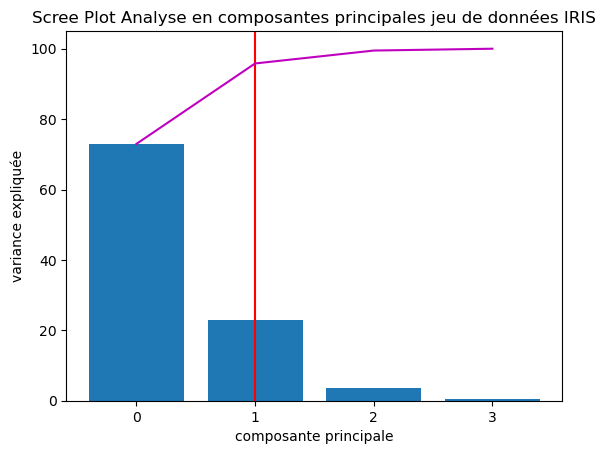

In [24]:
X = Iris.iloc[:, 0:4]
X_standard =StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X_standard)
features = range(pca.n_components_)
#visualisation
plt.bar(features, pca.explained_variance_ratio_ * 100 )
plt.axvline(x=1, color='r', linestyle='-')# point d'achoppement validé avec les reponses à nos premieres questions

plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,  color='m')#variance expliquée cumulée 
#Customisation
plt.xticks(features)  
plt.ylabel('variance expliquée')
plt.xlabel('composante principale')
plt.title('Scree Plot Analyse en composantes principales jeu de données IRIS')
plt.show()

9 - Creer un tableau recapitulatif avec les valeurs propres, les variances expliquées et enfin les variances expliquées cumulées.

In [25]:
composante_principale  = np.array([1, 2, 3, 4])
eigen_value = pca.explained_variance_
variance_expliquee = pca.explained_variance_ratio_ * 100
variance_expliquee_cumulee = pca.explained_variance_ratio_
table = pd.DataFrame(({'composante_principale': composante_principale,'valeur_propre': eigen_value,'variance_expliquée': variance_expliquee, 'var_expl_cumulee':variance_expliquee_cumulee}))
print(table.to_string(index=False))


 composante_principale  valeur_propre  variance_expliquée  var_expl_cumulee
                     1       2.938085           72.962445          0.729624
                     2       0.920165           22.850762          0.228508
                     3       0.147742            3.668922          0.036689
                     4       0.020854            0.517871          0.005179


10- Faire la table de saturation de notre PCA des differentes variables sur les composantes principales.

In [26]:
table_saturation = pd.DataFrame(model_standardise.components_.T, 
                                 columns=['composante 1', 'composante 2'], 
                                 index=iris.feature_names)
print(table_saturation)

                   composante 1  composante 2
sepal length (cm)      0.521066      0.377418
sepal width (cm)      -0.269347      0.923296
petal length (cm)      0.580413      0.024492
petal width (cm)       0.564857      0.066942


La variable petal lenght est celle qui a le plus de poids donc la contribution la plus significative pour la composante 1.
Ce resultat correspond à ce que nous avons dans le cercle de correlation car elle a la pente la plus proche de l'axe des abscise(composante 1)
et le vecteur est dans le sens positif. On peut en deduire une grande significativité et une correlation positive.

11- Representaiton des variables dont les saturations sont les plus fortes :

In [27]:
max_table= pd.DataFrame(table_saturation.idxmax())
max_table.shape
max_table.columns = ['Variable Maximale']

print(max_table)

              Variable Maximale
composante 1  petal length (cm)
composante 2   sepal width (cm)


12- Le signe de la saturation definit l'orientation des fleches et donc le sens des vecteurs. Pour les saturations positives concernant
la composante 1, les fleches des vecteurs iront vers la droite signe d' une correlation positive . Lorsque les fleches vont vers la gauche 
comme pour sepal width on entrevoit une correlation negative pour la composante 1.

13- La qualité de la representation quantifie la maniere dont une variable ou un individu (un fonction de l'analyse) est projeté par rapport aux composantes principales . Elle permets de mesurer la qualité de representation de la variable dans une analyse en composantes principalse. Elle est définie par le carré du cosinus de l'angle entre l'axe de projection et le vecteur à quantifier.Plus il est proche de 1'axe meilleure est la qualité la représentation.<br>
 La contribution quantifie l'impact d'une variable dans la creation d'une composante principale ou l' influence d'une variable dans la construction d'une composante principale.<br>
 En définitive les deux caractéristiques constituent des leviers qualitatifs d'interprétation de l'ACP qui sont complémentaires, la premiere permets juger de la vraisemblance de la représentation de la variable et la seconde de son impact sur la reduction de dimensionnalité.
 Nous allons maintenant essayer de les representer.

In [28]:
#nous utiliserons le meme modele que la question precedente  mais nous le ferons avec deux composantes aves des données standardisées:
iris = load_iris()
X = iris.data  
feature_names = iris.feature_names  
X_standard= StandardScaler().fit_transform(X)
pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(X_standard)



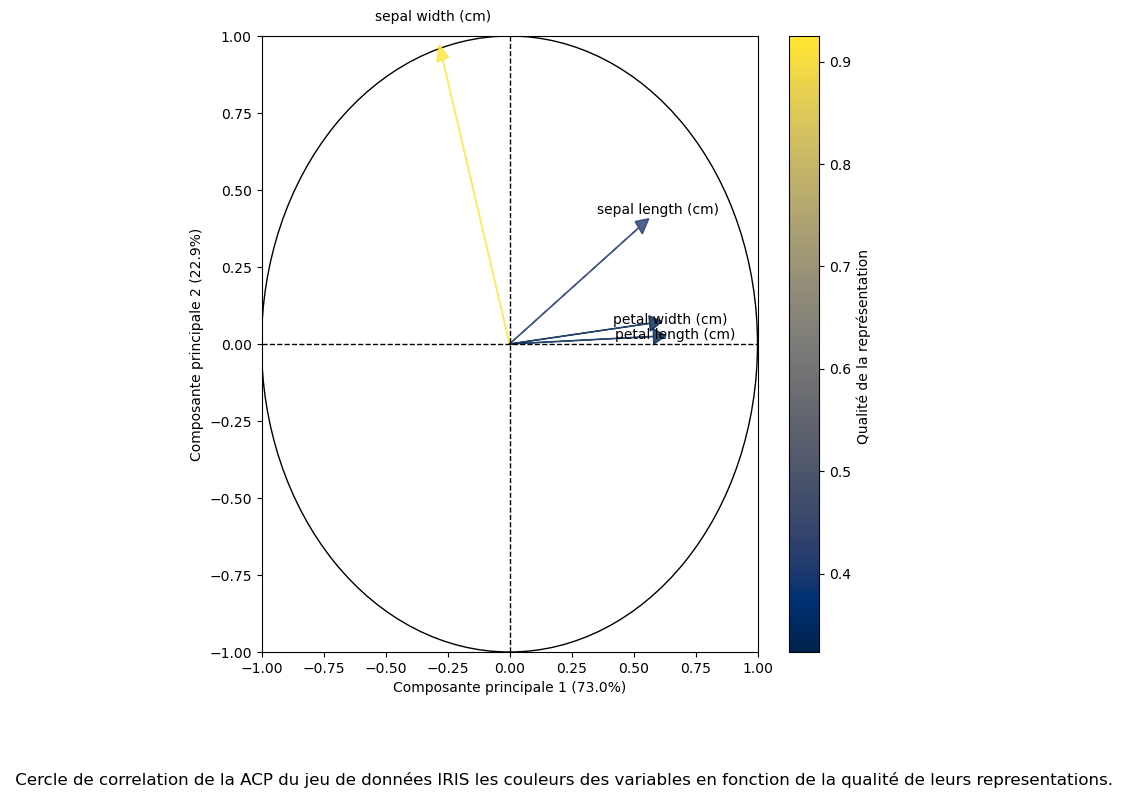

In [29]:
qualite= pca1.components_**2 #la qualité de la representation est définie par le carré des cosinus entre l'axe de projection est le vecteur
qualites = np.sum(qualite, axis = 0)#sommation de la qualité pour les deux axes

#- trace du cercle 
fig, axes = plt.subplots(figsize=(8,8))
#Circonscrire les axes de -1 à 1
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#tracer les axes d'abcisses et d'ordonnées
plt.plot([-1,1],[0,0],color='black',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='--',linewidth=1)
#ajouter un cercle
# Ajouter un cercle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
axes.add_artist(circle)
# Mise en forme pour les couleurs en fonction de la qualité :
norm = plt.Normalize(qualites.min(), qualites.max())
colors = cm.cividis(norm(qualites))

# mise en place de la légende colorée
sm = plt.cm.ScalarMappable(cmap=cm.cividis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Qualité de la représentation ')

#les vecteurs des variables à tracer
for i in range(pca1.components_.shape[1]): 
    plt.arrow(0, 0, pca1.components_[0, i], pca1.components_[1, i], color=colors[i], alpha=0.8, 
              head_width=0.05, head_length=0.05)
    plt.text(pca1.components_[0, i]*1.15, pca1.components_[1, i]*1.15, Iris.iloc[:,:4].columns[i], color='black', 
             ha='center', va='center')

# Mise en exegue de la variable expliquée par composante principale 
plt.xlabel(f'Composante principale 1 ({round((pca1.explained_variance_ratio_ * 100)[0] , 1)}%)')
plt.ylabel(f'Composante principale 2 ({round((pca1.explained_variance_ratio_ * 100)[1] , 1)}%)')
plt.figtext(0.5, -0.05,' Cercle de correlation de la ACP du jeu de données IRIS les couleurs des variables en fonction de la qualité de leurs representations.',ha='center', va='center', fontsize=12)
plt.show()


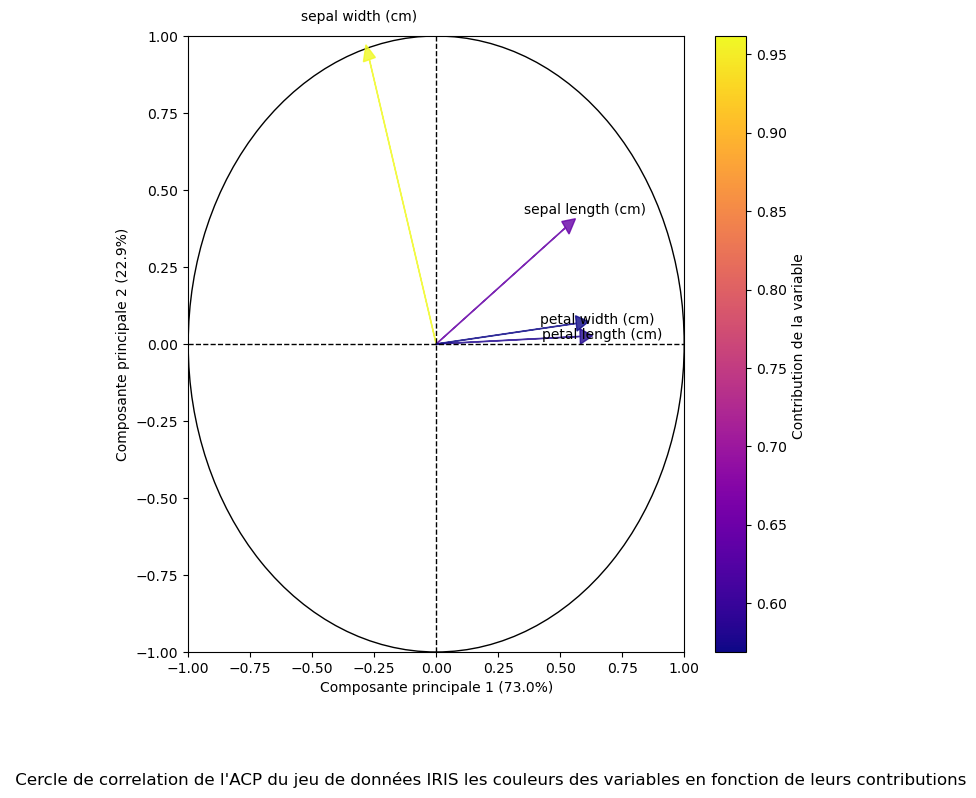

In [30]:
#faisons la meme chose avec les contributions
contribution = np.sqrt(np.sum(pca1.components_**2, axis=0))   #calcul des contribution totales
#normalisation pour les couleurs 
norm = plt.Normalize(contribution.min(), contribution.max())
colors = cm.plasma(norm(contribution))

#- trace du cercle 
fig, axes = plt.subplots(figsize=(8,8))
#Circonscrire les axes de -1 à 1
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#tracer les axes d'abcisses et d'ordonnées
plt.plot([-1,1],[0,0],color='black',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='--',linewidth=1)
#ajouter un cercle
# Ajouter un cercle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
axes.add_artist(circle)

#traces des vecteurs
#les vecteurs des variables à tracer
for i in range(pca1.components_.shape[1]): 
    plt.arrow(0, 0, pca1.components_[0, i], pca1.components_[1, i], color=colors[i], alpha=0.8, 
              head_width=0.05, head_length=0.05)
    plt.text(pca1.components_[0, i]*1.15, pca1.components_[1, i]*1.15, Iris.iloc[:,:4].columns[i], color='black', 
             ha='center', va='center')

# mise en place de la légende colorée
sm = plt.cm.ScalarMappable(cmap=cm.plasma, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Contribution de la variable ')

# Mis en exegue de la variable expliquée par composante principale 
plt.xlabel(f'Composante principale 1 ({round((pca1.explained_variance_ratio_ * 100)[0] , 1)}%)')
plt.ylabel(f'Composante principale 2 ({round((pca1.explained_variance_ratio_ * 100)[1] , 1)}%)')
plt.figtext(0.5, -0.05," Cercle de correlation de l'ACP du jeu de données IRIS les couleurs des variables en fonction de leurs contributions",ha='center', va='center', fontsize=12)
plt.show()

- 14 . Representation factorielle des individus en fonction de la qualité de la représentation.

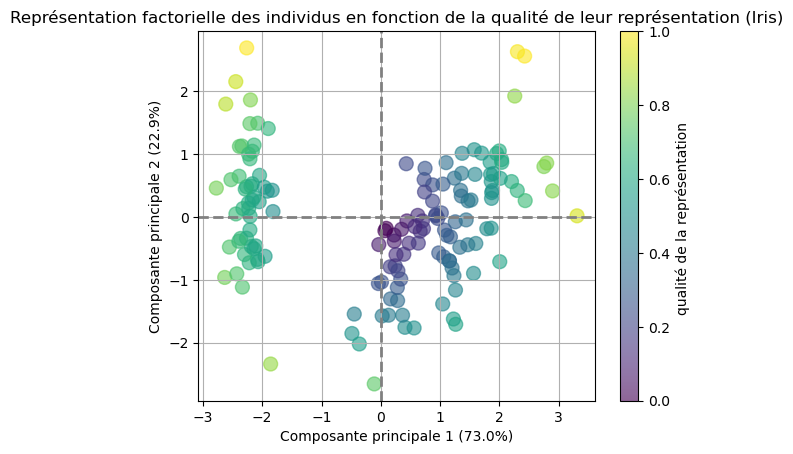

In [31]:
d = pd.DataFrame(data=X_pca1, columns=['composante 1', 'composante 2']) # de données des resultats de l'acp 
d['qualite'] = np.sqrt(d['composante 1']**2 + d['composante 2']**2) #determinons la qualité de la representation pour chaque point (en utilisant pythagore) et ensuite

#travaillons sur la qualité de la representation des individus en la normalisant 
normalisation = (d['qualite'] - d['qualite'].min()) / (d['qualite'].max() - d['qualite'].min())
d['color'] = normalisation
#visualisation factorielle des individus 
individus = plt.scatter(d['composante 1'], d['composante 2'], c=d['color'], cmap='viridis', s=100, alpha=0.6)

#prise en compt de la qualité des donneés en legende
cbar = plt.colorbar(individus)
cbar.set_label('qualité de la représentation ')

#customiser
plt.title('Représentation factorielle des individus en fonction de la qualité de leur représentation (Iris)')
plt.xlabel(f'Composante principale 1 ({round((pca1.explained_variance_ratio_ * 100)[0] , 1)}%)')
plt.ylabel(f'Composante principale 2 ({round((pca1.explained_variance_ratio_ * 100)[1] , 1)}%)')

#axe des abscisses et ordonnées
plt.axhline(0, color='grey', lw=2, ls='--')  # Ligne horizontale à y=0
plt.axvline(0, color='grey', lw=2, ls='--')  # Ligne verticale à x=0

plt.grid()

plt.show()




15- faire une table de la contribution des individus :

In [32]:

# Calcul de la contribution
contribution = d ** 2  # Élever au carré pour avoir la contribution

# Calculer la somme des contributions pour chaque axe
total1 = contribution['composante 1'].sum()
total2 = contribution['composante 2'].sum()

# Calculer les contributions en pourcentage
d['contribution_perc_1'] = (contribution['composante 1'] / total1) * 100
d['contribution_perc_2'] = (contribution['composante 2'] / total2) * 100

#Imprimer la table
print(d[['contribution_perc_1','contribution_perc_2']])


     contribution_perc_1  contribution_perc_2
0               1.171580             0.168066
1               0.989185             0.331467
2               1.276816             0.085264
3               1.207737             0.260298
4               1.304631             0.305166
..                   ...                  ...
145             0.799220             0.109218
146             0.559172             0.586448
147             0.528573             0.052805
148             0.430483             0.745880
149             0.210807             0.000432

[150 rows x 2 columns]


La contribution represente le poids de l'individus dans la construction de la composante principale. 

18- L'alghorithme kmeans est un alghorithme de machine learning permettant de regrouper les individus de bases de données en un nombre de k clusters . Ce partitionnement se fait grace une regroupement par ressemblance en set clustering. C'est une technique d'apprentissage non supervisé qui determine des patterns ou relations sous-jacentes entre les individus permettant de les classifier en fonction de leurs similarités.<br>
Il fonctionne de manière iterative en minimisant les distances entre les individus et les centroides(point central d'un regroupement de données).
L'étape suivante est l'implementation des clusters. Ensuite, les points sont reliés au cluster qui à le centroide dont la distance est la plus faible. C' est l'expectation.
Ensuite nous assistons aux ajustements des centroides en fonction des points attribués aux clusters .C' est la maximisation. 
Ces etapes sont repetées jusqu'à un optimum qui sera atteint soit par un nombre d'iterations ou l'impossibilité des centroide de s'ajuster.
Les centroides se déplacent au fil des iterations en minimisant aux maximum à chaque itération la variance intra-cluster. 


19- Faire un kmeans avec iris sauf erreur de ma part, nous devrons faire un kmeans en fonction de l'ACP que nous avons fait précedemment.
Nous choisissons donc de faire d'abord une ACP de iris avec les données standardisées . Ensuite apres avoir appliqué une reduction de dimensionnalité à deux composantes nous appliquerons le clustering kmeans aux composantes principales .

In [33]:
# - reduction de dimensionnalité du jeu de données standardidées IRIS:
iris = load_iris()
X = iris.data
y = iris.target
especes = iris.target_names
X_standard= StandardScaler().fit_transform(X) #standardisation des données

#PCA
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)
#dataframe des composantes principales de la pca
d_pca2 = pd.DataFrame(X_pca2, columns= ['composante1', 'composante2'])
d_pca2['especes'] = Y # utiliser un Y implementer plus haut
d_pca2#verification

#implementation du Kmeans :
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca2)

#Assignation aux clusters 
labels = kmeans.labels_

# assignons les clusters aux dataframes
d_pca2['clusters'] = labels 
d_pca2#verification

composante1  composante2    especes  clusters
0      -2.684126     0.319397     setosa         1
1      -2.714142    -0.177001     setosa         1
2      -2.888991    -0.144949     setosa         1
3      -2.745343    -0.318299     setosa         1
4      -2.728717     0.326755     setosa         1
..           ...          ...        ...       ...
145     1.944110     0.187532  virginica         2
146     1.527167    -0.375317  virginica         0
147     1.764346     0.078859  virginica         2
148     1.900942     0.116628  virginica         2
149     1.390189    -0.282661  virginica         0

[150 rows x 4 columns]

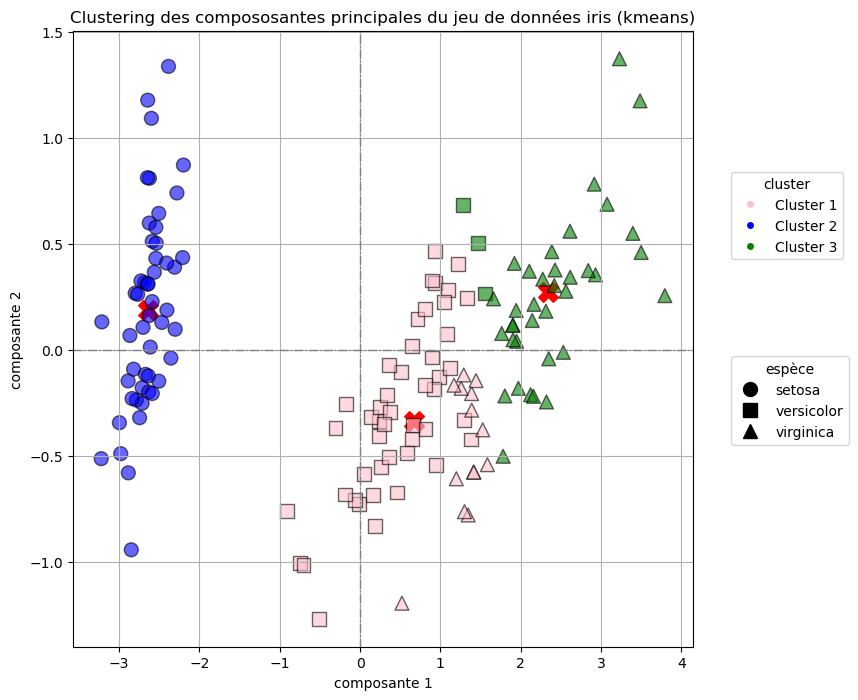

In [34]:
# Passons à la visualisation , nous avons choisit de materialiser les differentes especes tout en differenciant les clusters
#marqueurs :
marqueurs = ['o','s','^'] #pour chaque espece
#couleur pour les clusters
couleur = ['pink', 'blue','green']
#visualisation
plt.figure(figsize=(8,8))

# Tracer les axes d'abcisses et d'ordonnées
plt.axhline(0, color='gray', linestyle='-.', linewidth=1)
plt.axvline(0, color='gray', linestyle='-.', linewidth=1)

#materialisation de centroids
centroid = kmeans.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1], marker='X', label='centroid', c='red', s=200, alpha=1)

#implementation de des couleurs et des marqueurs pour chaque fleur
for i, marqueur in enumerate(marqueurs):
    plt.scatter(X_pca2[y == i, 0], X_pca2[y == i, 1], 
                c=[couleur[cluster] for cluster in clusters[y == i]], 
                marker=marqueur, edgecolor='black', 
                label=f'{especes[i]}' ,s =100,alpha=0.6)
#travail sur les legendes(galere)

for i in range(3):
    plt.scatter([], [], c=couleur[i], label=f'Cluster {i+1}', edgecolor='black')#legende couleur

for i, marqueur in enumerate(marqueurs):
    plt.scatter([], [], marker=marqueur, color='black', label=especes[i])#legende marqueur
# implementation legende couleur (cluster)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Légende')

legend_couleur = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', 
                             markerfacecolor=couleur[i]) for i in range(3)]

legend1 = plt.legend(handles=legend_couleur, title='cluster', loc='center left', bbox_to_anchor=(1.05, 0.7))

# création de la légende des marqueurs (espèces)
legend_marqueur = [plt.Line2D([0], [0], marker=marqueurs[i], color='black', label=especes[i], 
                             markersize=10, linestyle='None') for i in range(3)]

legend2 = plt.legend(handles=legend_marqueur, title='espèce', loc='center left', bbox_to_anchor=(1.05, 0.4))

plt.gca().add_artist(legend1)#ajout de la legende 1

#customiser
plt.title('Clustering des compososantes principales du jeu de données iris (kmeans)')
plt.xlabel('composante 1')
plt.ylabel('composante 2')

plt.grid()
plt.show()




- determination des données pertinentes clusters et variables :

In [35]:
#recréons le dataframe iris
iris = load_iris()
#transformer iris en dataframe
Iris= pd.DataFrame(data=iris.data, columns=iris.feature_names)
Iris['especes']= iris.target_names[iris.target]# implementation de leur nom
Iris['cluster'] = clusters
Iris.iloc[:,0:4]
#print('Les valeurs moyennes des variables pour chaque cluster :')
print(Iris.drop(columns=['especes']).groupby('cluster').mean())

#print('les valeurs moyenne des variables pour chaque espece :')
print(Iris.groupby('especes').mean())

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 5.883607          2.740984           4.388525   
1                 5.006000          3.428000           1.462000   
2                 6.853846          3.076923           5.715385   

         petal width (cm)  
cluster                    
0                1.434426  
1                0.246000  
2                2.053846  
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
especes                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  cluster  
especes                                
setosa                 0.246     1.00  
versicolor             1.326     0.12  
virginica    

In [36]:
espece_cluster=Iris.groupby(['cluster', 'especes']).size().unstack(fill_value=0)
espece_cluster['somme'] = espece_cluster.sum(axis=1)
print('repartition des especes par cluster :')
espece_cluster

repartition des especes par cluster :


especes  setosa  versicolor  virginica  somme
cluster                                      
0             0          47         14     61
1            50           0          0     50
2             0           3         36     39

In [37]:
# Compter les individus par espèce et cluster
a = Iris.groupby(['cluster', 'especes']).size().unstack(fill_value=0)

# Calculer le total par cluster
b= a.sum(axis=1)

# Créer un DataFrame pour les pourcentages
percent = round(a.div(b, axis=0) * 100,2)

# Afficher les résultats
print("Pourcentage des espèces par cluster :")
percent


Pourcentage des espèces par cluster :


especes  setosa  versicolor  virginica
cluster                               
0           0.0       77.05      22.95
1         100.0        0.00       0.00
2           0.0        7.69      92.31

20-  Methode determination du nombre de cluster optimal pour integrer un alghorithme kmeans. Nous verrons deux methodes celles du coude(Elbow Method) ou methode des batons brises et enfin la methode la silhouette(Average Silouhette).
  

- la methode du coude : on essaie de determiner l'evolution de l'inertie en fonction du nombre de clusters et on la materialise sur un screeplot.
  Ensuite nous devrons determiner ou se situe le coude de la courbe ou si vous preferez l'endroit ou la pente de la courbe est de la moins prononcée . Le K optimal se trouvera à cet endroit .
  

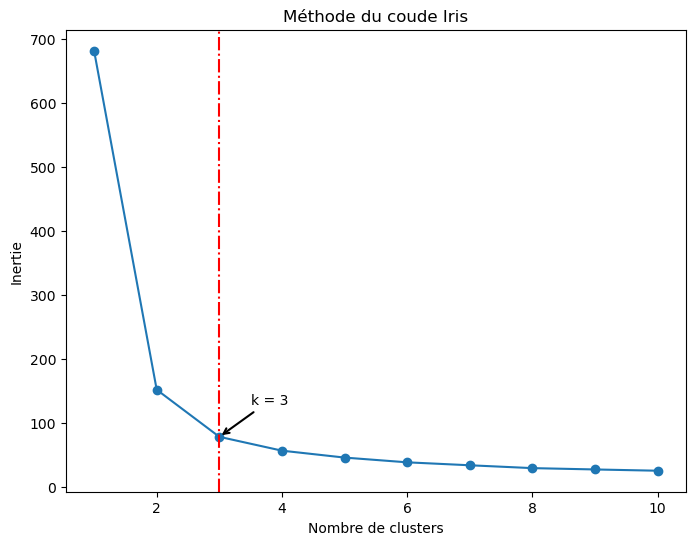

In [38]:
#exemple avec iris :
iris = load_iris()
X = iris.data
kmeans = KMeans(3)
kmeans.fit(X)


distance=[] #determinantion de l' inertie pour chaque nombre cluster
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(X)
    distance_k = kmeans.inertia_
    distance.append(distance_k)

clusters = range(1,11)  

#visualisation
fig, ax = plt.subplots(figsize=(8, 6))

#customisé
ax.plot(clusters, distance, marker='o')
ax.set(title='Méthode du coude Iris', 
       xlabel='Nombre de clusters', 
       ylabel='Inertie')

k_optimal = 3
plt.axvline(x=k_optimal, color='red', linestyle='-.')
plt.annotate(f'k = {k_optimal}', 
             xy=(k_optimal, distance[k_optimal - 1]), 
             xytext=(k_optimal + 0.5, distance[k_optimal - 1] + 50),  # Ajuster pour que le texte soit bien visible
             fontsize=10,
             color='black',
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))

plt.show()


- La methode  de silhouette average se base sur calcul de scoring sur un indicateur nommé score de silhouette moyen . On fait par la suite une visualisation qui relie se scoring avec le nombre de cluster . Le point de la courbe  le plus proche d'un score égal à 1 representera aussi le k optimal.

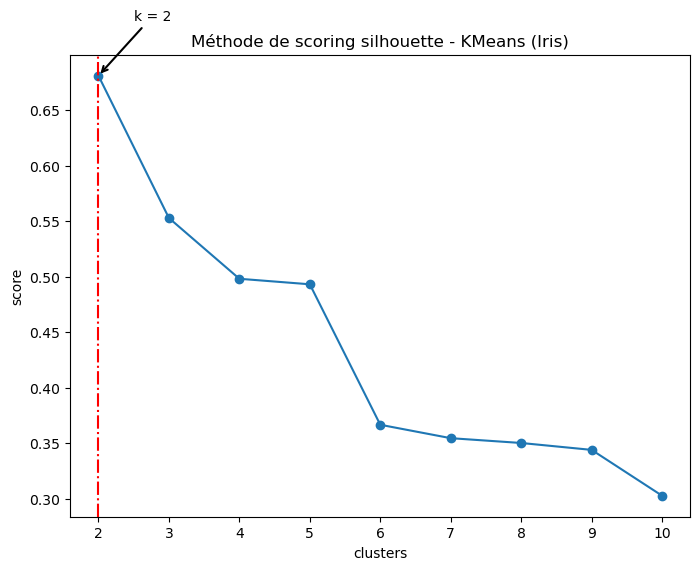

In [39]:
#listes de depart
score = []
clusters = range(2, 11)  

# scoring
for k in clusters:
    kmeans = KMeans(n_clusters=k)  
    labels = kmeans.fit_predict(X) 
    scoring = silhouette_score(X, labels)  
    score.append(scoring)  

#  k optimal
k_optimal = clusters[np.argmax(score)]

# visualisation
plt.figure(figsize=(8, 6))
plt.plot(clusters, score, marker='o')
plt.title('Méthode de scoring silhouette - KMeans (Iris)',)
plt.xlabel('clusters')
plt.ylabel('score')

# Annoter le k optimal
plt.axvline(x=k_optimal, color='red', linestyle='-.')
plt.annotate(f'k = {k_optimal}', 
             xy=(k_optimal, score[np.argmax(score)]), 
             xytext=(k_optimal + 0.5, score[np.argmax(score)] + 0.05),  
             fontsize=10,
             color='black',
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))


plt.show()


##  Projet 2 : : S’entraiıner sur les données de d´ecathlon

1. Faire une ACP avec le jeu de donnéés décathlon :


- Importons et explorons le jeu de données de départ .

In [40]:
decathlon = pd.read_csv("decathlon.csv", sep = ';')
decathlon.head()

Unnamed: 0   100m  Longueur  Poids  Hauteur   400m  110m H  Disque  Perche  \
0     Sebrle  10.85      7.84  16.36     2.12  48.36   14.05   48.72     5.0   
1       Clay  10.44      7.96  15.23     2.06  49.19   14.13   50.11     4.9   
2     Karpov  10.50      7.81  15.93     2.09  46.81   13.97   51.65     4.6   
3      Macey  10.89      7.47  15.73     2.15  48.97   14.56   48.34     4.4   
4    Warners  10.62      7.74  14.48     1.97  47.97   14.01   43.73     4.9   

   Javelot   1500m  Classement  Points Competition  
0    70.52  280.01           1    8893          JO  
1    69.71  282.00           2    8820          JO  
2    55.54  278.11           3    8725          JO  
3    58.46  265.42           4    8414          JO  
4    55.39  278.05           5    8343          JO

In [41]:
decathlon.shape

(41, 14)

In [42]:
decathlon.columns

Index(['Unnamed: 0', '100m', 'Longueur', 'Poids', 'Hauteur', '400m', '110m H',
       'Disque', 'Perche', 'Javelot', '1500m', 'Classement', 'Points',
       'Competition'],
      dtype='object')

In [43]:
decathlon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   41 non-null     object 
 1   100m         41 non-null     float64
 2   Longueur     41 non-null     float64
 3   Poids        41 non-null     float64
 4   Hauteur      41 non-null     float64
 5   400m         41 non-null     float64
 6   110m H       41 non-null     float64
 7   Disque       41 non-null     float64
 8   Perche       41 non-null     float64
 9   Javelot      41 non-null     float64
 10  1500m        41 non-null     float64
 11  Classement   41 non-null     int64  
 12  Points       41 non-null     int64  
 13  Competition  41 non-null     object 
dtypes: float64(10), int64(2), object(2)
memory usage: 4.6+ KB


In [44]:
import sweetviz as sv
rapport = sv.analyze(decathlon)
rapport.show_html('decathlon.html')

                                             |          | [  0%]   00:00 -> (? left)

Report decathlon.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [45]:
decathlon.isna().sum()

Unnamed: 0     0
100m           0
Longueur       0
Poids          0
Hauteur        0
400m           0
110m H         0
Disque         0
Perche         0
Javelot        0
1500m          0
Classement     0
Points         0
Competition    0
dtype: int64

Pas de données manquantes mais un jeu de données avec deux variables object à élaguer nous travaillerons sur le jeu de données décathlon troncquées des variables  Unnamed: 0 et Competicion. Nous choisissons aussi d'enlever la variable classement qui est ordinale donc non recommandée dans une ACP. La variable Points est aussi à élaguer car nous voulons concentrer notre analyse sur l'analyse des spécialités sportives et les athlétes.

In [46]:
decathlon_num = decathlon.drop(columns =['Unnamed: 0', 'Competition', 'Points', 'Classement'])#dataset  à utiliser dans l'ACP
#Nous allons maintenant implémenter une ACP avec les données standardisées :
pca =PCA() #model 
decathlon_num_st = StandardScaler().fit_transform(decathlon_num)#données standardisées
decathlon_pca = pca.fit_transform(decathlon_num_st)


In [47]:
#Faisons un tableau de la variance expliquée et des pourcentages de variances expliquées et pourcentages variances expliquées cumulées .
dec_var = pd.DataFrame({ 'composante' : ['composante' + str(x+1) for x in range(10)],
                        'variance_explique' : np.round(pca.explained_variance_, 2),
                        'variance_expliquée _percent' : np.round(pca.explained_variance_ratio_ *100),
                        'variance_expliquée _percent_cumsum' : np.round(np.cumsum(pca.explained_variance_ratio_ *100))
                       })
dec_var

composante  variance_explique  variance_expliquée _percent  \
0   composante1               3.35                         33.0   
1   composante2               1.78                         17.0   
2   composante3               1.44                         14.0   
3   composante4               1.08                         11.0   
4   composante5               0.70                          7.0   
5   composante6               0.61                          6.0   
6   composante7               0.46                          5.0   
7   composante8               0.41                          4.0   
8   composante9               0.22                          2.0   
9  composante10               0.19                          2.0   

   variance_expliquée _percent_cumsum  
0                                33.0  
1                                50.0  
2                                64.0  
3                                75.0  
4                                82.0  
5                                88.0  
6                                92.0  
7                                96.0  
8                                98.0  
9                               100.0

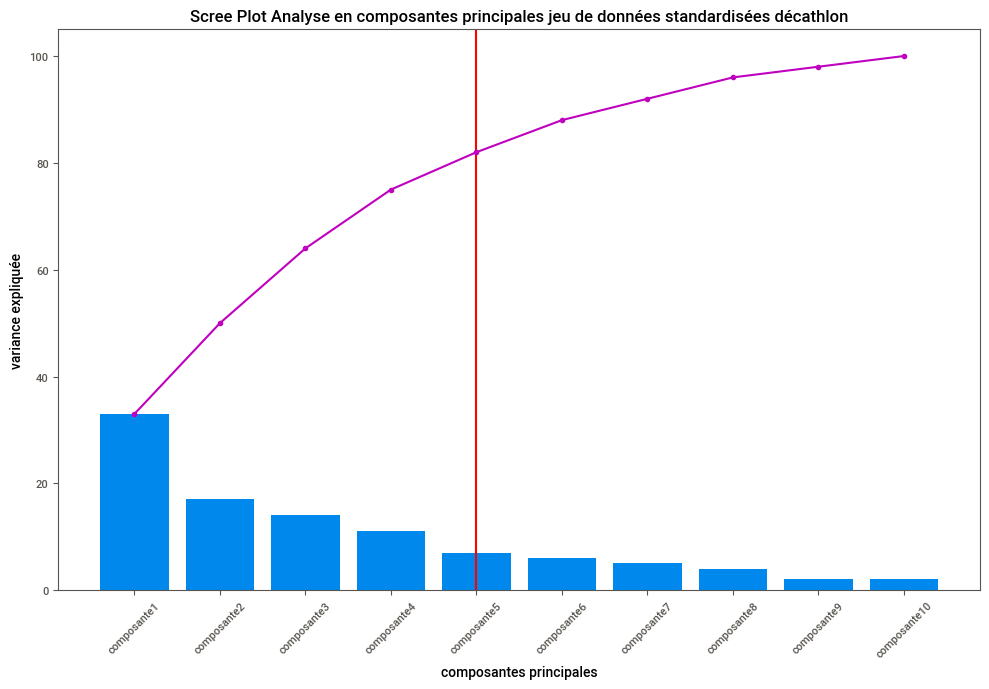

In [48]:
#faisons une visualisation avec les variances expliquée en pourcentage et les variances expliquées cumulées.
#visualisation
plt.figure(figsize=(10, 7))

plt.bar(dec_var['composante'], dec_var['variance_expliquée _percent'] )
plt.axvline(x=4, color='r', linestyle='-')# point d' achoppement validée
plt.plot(dec_var['variance_expliquée _percent_cumsum'],  color='m',marker='o')#variance expliquée cumulée 
#Customisation
plt.xticks(rotation=45)
plt.ylabel('variance expliquée')
plt.xlabel('composantes principales')
plt.title('Scree Plot Analyse en composantes principales jeu de données standardisées décathlon')
plt.tight_layout()
plt.show()

Nous remarquons que les 5 premières composantes couvrent plus de 80% de la variance expliquée.

- Produisons le cercle de corrélation :

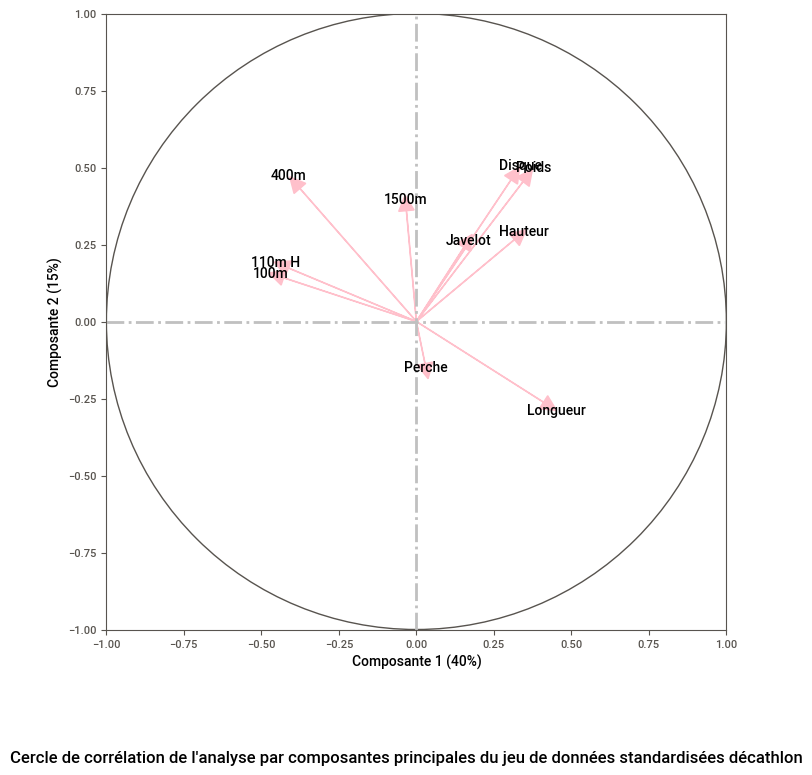

In [49]:
#creation du cercle trigonometrique qui abritera le cercle de correlations
fig, axes = plt.subplots(figsize=(8,8))
#Circonscrire les axes de -1 à 1
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#tracer les axes d'abcisses et d'ordonnées
plt.plot([-1,1],[0,0],color='silver',linestyle='-.',linewidth=2)
plt.plot([0,0],[-1,1],color='silver',linestyle='-.',linewidth=2)
#ajouter un cercle
cercle = plt.Circle((0,0),1,fill=False)
axes.add_artist(cercle)
# Nous creeons la boucle necessaire pour faire les vecteurs

for i, (name, vector) in enumerate(zip(decathlon_num.columns, pca.components_.T)):
    plt.arrow(0, 0, vector[0], vector[1], head_width=0.05, head_length=0.05, color='pink')
    distance_factor = 1.1
    plt.text(vector[0] * distance_factor, vector[1] * distance_factor, name, 
             color='black', ha='center', va='center')

plt.xlabel("Composante 1 (40%)")  # Ajoutez le pourcentage d'explication
plt.ylabel("Composante 2 (15%)")
plt.figtext(0.5, -0.05, "Cercle de corrélation de l'analyse par composantes principales du jeu de données standardisées décathlon", ha='center', va='center', fontsize=12)
plt.show()

2 - Representation factorielle des individus :

In [50]:
#dataframe de base
decathlon_pca_df =pd.DataFrame({ 'Composante 1' : decathlon_pca[:,0],
                                 'Composante 2'  : decathlon_pca[:,1],
                                 'Athlete' : decathlon['Unnamed: 0'],
                                 'Competition' : decathlon['Competition'] ,
                                'Qualite' : np.sum(decathlon_pca **2, axis=1) })

decathlon_pca_df.head()

Composante 1  Composante 2  Athlete Competition    Qualite
0      4.038449      1.365826   Sebrle          JO  23.452440
1      3.919365      0.836961     Clay          JO  21.599144
2      4.619987      0.039995   Karpov          JO  25.059172
3      2.233461      1.041766    Macey          JO  11.791425
4      2.168396     -1.803200  Warners          JO   8.872533

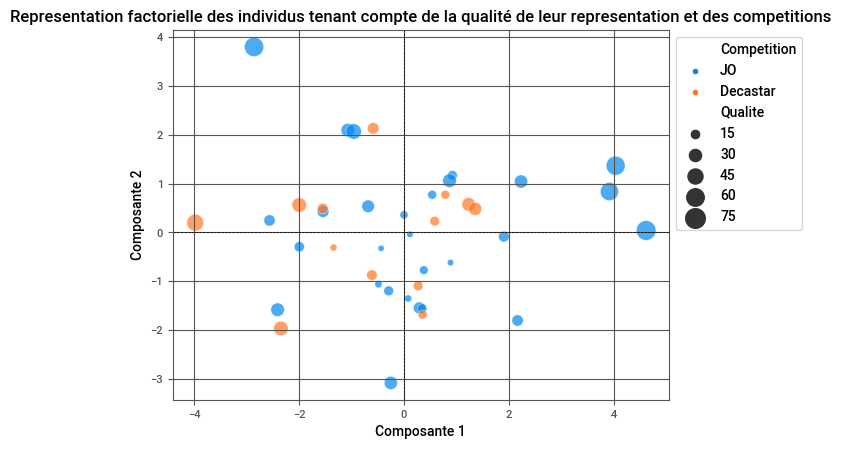

In [51]:
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)  # Axe horizontal (abscisse)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)  # Axe vertical (ordonnée)
sns.scatterplot(x=decathlon_pca_df['Composante 1'], y=decathlon_pca_df['Composante 2'],  size=decathlon_pca_df['Qualite']* 3, hue=decathlon_pca_df['Competition'],alpha=0.7, sizes=(20, 200), legend='brief')
plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Representation factorielle des individus tenant compte de la qualité de leur representation et des competitions")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)

3 - Representation 3D de la l'ACP du jeu de données décathlon.


- le dataframe nécessaire :

In [52]:
#dataframe de base
decathlon_pca_df1 =pd.DataFrame({ 'Composante 1' : decathlon_pca[:,0],
                                 'Composante 2'  : decathlon_pca[:,1],
                                 'Composante 3'  : decathlon_pca[:,3],
                                 'Athlete' : decathlon['Unnamed: 0'],
                                 'Competition' : decathlon['Competition'] ,
                                'Qualite' : np.sum(decathlon_pca **2, axis=1) })
decathlon_pca_df1['Competition_num'] = pd.Categorical(decathlon_pca_df1['Competition']).codes #encodage variable competition pour la coloration en fonction de la competition avec ploty

decathlon_pca_df1.head()

Composante 1  Composante 2  Composante 3  Athlete Competition    Qualite  \
0      4.038449      1.365826      1.941134   Sebrle          JO  23.452440   
1      3.919365      0.836961      1.493972     Clay          JO  21.599144   
2      4.619987      0.039995     -1.313526   Karpov          JO  25.059172   
3      2.233461      1.041766     -0.743214    Macey          JO  11.791425   
4      2.168396     -1.803200     -0.284600  Warners          JO   8.872533   

   Competition_num  
0                1  
1                1  
2                1  
3                1  
4                1

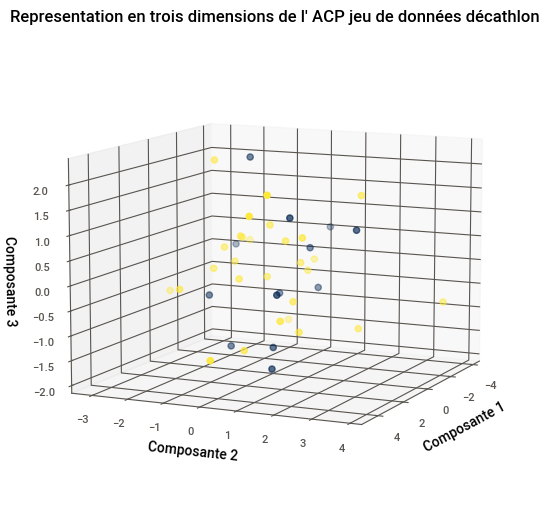

In [53]:
fig = plt.figure(figsize=(8,6))# graphique tenant compte du nouveau dataframe 


ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

scatter = ax.scatter(decathlon_pca_df1['Composante 1'], decathlon_pca_df1['Composante 2'],decathlon_pca_df1['Composante 3'], c=decathlon_pca_df1['Competition_num'],
    cmap='cividis', marker='o')
ax.view_init(elev=10, azim =25)  # Ajustement pour un bon angle

ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')

plt.title ("Representation en trois dimensions de l' ACP jeu de données décathlon")


plt.show()

5- Precisez les avantages  et inconvenients respectifs des méthodes kmeans et CAH :

La CAH(Classification Ascendante Hiérarchique) est une méthode de machine learning non supervisée plus précisement une technique de clustering. Elle presente l'avantage de ne pas nécéssiter de determiner un nombre de clusters optimal. Elle donne  aussi la possibilité de voir clairement manières dont les clusters ont été agrégés. Malheureusement, il peut etre tres difficcile à appréhender dans certains cas(volumetrie importante de données) et tres sensible aux outliers.<br>
Le Kmeans est aussi une methode de clustering  présentant l' interet d'etre facile à integrer (rapidité et aisé à comprendre). Cependant il nécessite une phase d'initialisation obligatoire avec une determination du nombre de cluster . Cette phase nécéssaire peut impacter négativement le resultat si elle est mal mise en oeuvre.<br>
En résumé la CAH est accumulative(agglomeration des données individuelles en fonction d'un critere prédéfini) et ascendante( hierarchie dans l'agglomeration des données vers les clusters). Le Kmeans lui suit une logique de division en fonction de clusters prédéfinis. La première permets d'avoir une vision complete de la formation des clusters et du fonctionnement d'alghorithme, la seconde simplifie la vision des clusters.

6.Faire un Kmeans et une CAH du jeu de données décathlon .


- KMEans :

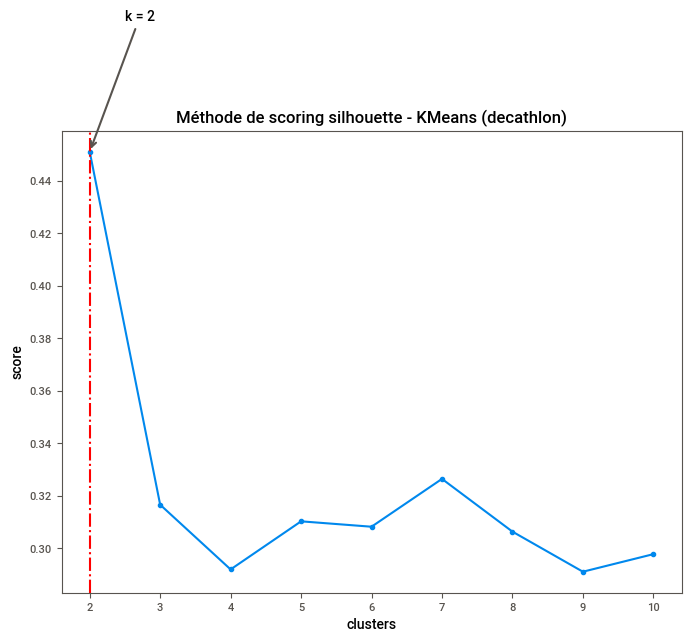

In [54]:
#implementons l'algorithme :
decathlon_num_st = StandardScaler().fit_transform(decathlon_num)#données standardisées

#determination du k-optimal silhouette score: 
score = []
clusters = range(2, 11)  

# scoring
for k in clusters:
    kmeans = KMeans(n_clusters=k)  
    labels = kmeans.fit_predict(decathlon_num) 
    scoring = silhouette_score(decathlon_num, labels)  
    score.append(scoring)  

# visualisation
plt.figure(figsize=(8, 6))
plt.plot(clusters, score, marker='o')
plt.title('Méthode de scoring silhouette - KMeans (decathlon)',)
plt.xlabel('clusters')
plt.ylabel('score')

# Annoter le k optimal
k_optimal = 2
plt.axvline(x=k_optimal, color='red', linestyle='-.')
plt.annotate(f'k = {k_optimal}', 
             xy=(k_optimal, score[np.argmax(score)]), 
             xytext=(k_optimal + 0.5, score[np.argmax(score)] + 0.05),  
             fontsize=10,
             color='black',
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))


plt.show()



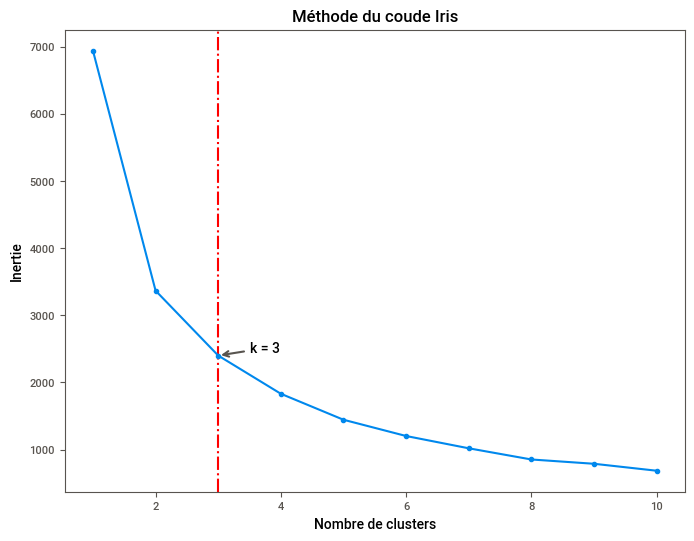

In [55]:
#methode du coude
distance = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(decathlon_num)
    distance_k = kmeans.inertia_
    distance.append(distance_k)

clusters = range(1,11)  

#visualisation
fig, ax = plt.subplots(figsize=(8, 6))


k_optimal = 3
plt.axvline(x=k_optimal, color='red', linestyle='-.')
plt.annotate(f'k = {k_optimal}', 
             xy=(k_optimal, distance[k_optimal - 1]), 
             xytext=(k_optimal + 0.5, distance[k_optimal - 1] + 50),  # Ajuster pour que le texte soit bien visible
             fontsize=10,
             color='black',
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))


#customisé
ax.plot(clusters, distance, marker='o')
ax.set(title='Méthode du coude Iris', 
       xlabel='Nombre de clusters', 
       ylabel='Inertie')

plt.show()




Nous avons deux resultats trois pour la methode du coude et deux pour la methode scoring silhouette . Nous allons essayer de faire les deux pour essayer
voir les résultats .

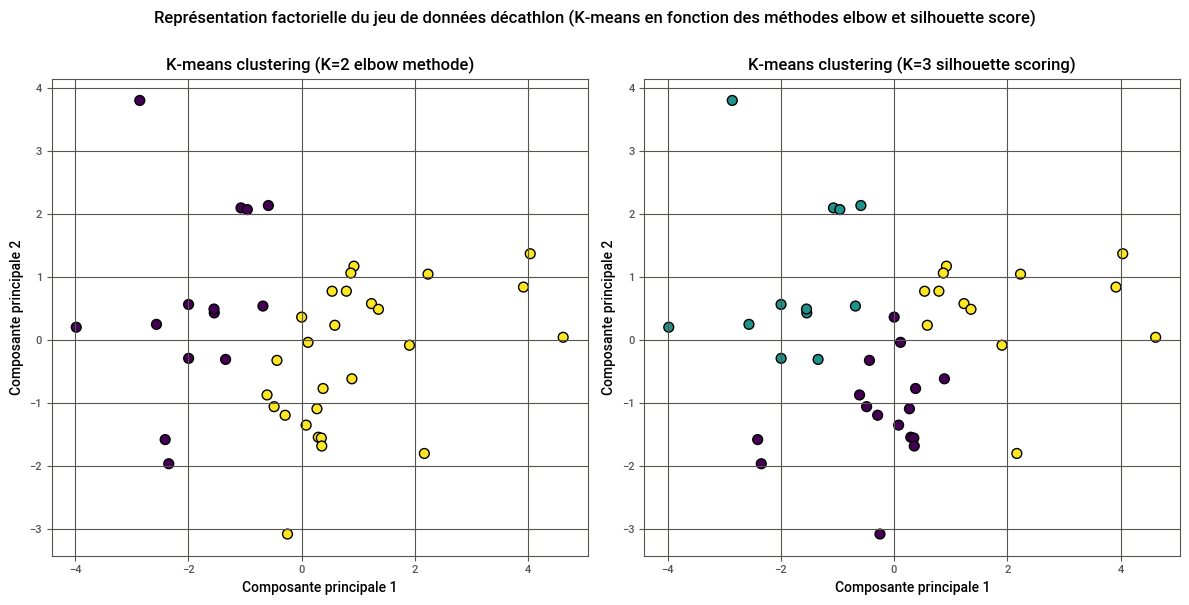

In [56]:
# kmeans avec le nombre de clusters definit par silhouette scoring
kmeans2 = KMeans(n_clusters=2)
labels2 = kmeans2.fit_predict(decathlon_num_st)#données standardisées

# kmeans avec le nombre de clusters definit de la methode du coude 
kmeans3 = KMeans(n_clusters=3)
labels3 = kmeans3.fit_predict(decathlon_num_st)#données standardisées

#Nous allons utiliser le dataframe plus haut avec la reduction du dimensionalité par ACP en deux composantes principale .
decathlon_pca_df

#visualisation avec sublotes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 2  clusters
axs[0].scatter(decathlon_pca_df['Composante 1'], decathlon_pca_df['Composante 2'], c=labels2, cmap='viridis', marker='o', edgecolor='k',s=50)
axs[0].set_title('K-means clustering (K=2 elbow methode)')
axs[0].set_xlabel('Composante principale 1')
axs[0].set_ylabel('Composante principale 2')
axs[0].grid()

# 3 clusters
axs[1].scatter(decathlon_pca_df['Composante 1'], decathlon_pca_df['Composante 2'], c=labels3, cmap='viridis', marker='o', edgecolor='k', s=50)
axs[1].set_title('K-means clustering (K=3 silhouette scoring)')
axs[1].set_xlabel('Composante principale 1')
axs[1].set_ylabel('Composante principale 2')
axs[1].grid()

plt.suptitle('Représentation factorielle du jeu de données décathlon (K-means en fonction des méthodes elbow et silhouette score)', y=1)  
plt.tight_layout()
plt.show()

- CAH :

In [57]:
#dataframe à utiliser 
decathlon_num_st_df = pd.DataFrame(decathlon_num_st)
decathlon_num_st_df['Athlete'] = decathlon['Unnamed: 0']

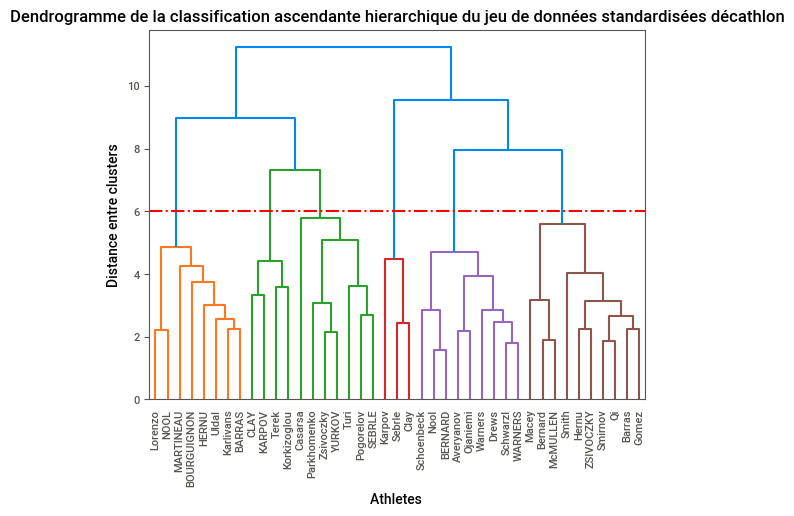

In [58]:
Z = linkage(decathlon_num_st_df.iloc[:, 0:10], method='ward') 
dendrogram(Z, labels=decathlon_num_st_df['Athlete'].values)

#visualisation dendogramme

plt.title("Dendrogramme de la classification ascendante hierarchique du jeu de données standardisées décathlon")
plt.xlabel("Athletes ")
plt.ylabel("Distance entre clusters")
#nous avons choisis une ligne coupure egale a 6 en ordonnées car avant cela les distance entre cluster sont assez réduite par la suite on remarque une augmentation significative de la distance entre cluster
plt.axhline(y=6, color='r', linestyle='-.') 

plt.show()

## Projet 3. Dating et analyse des correspondances multiples

1 - Les deux methodes statistiques sont utilisées par l'analyse de variables qualitatives la differences réside dans le nombre de variables prises en charge. L'analyse des correspondances prends en charge de deux variables qualitatives alors que l'analyse en correspondances multiples, elle, se charge de l'analyse de plusieurs variables qualitatives.


- Importons les données :

In [59]:
dating = pd.read_csv('tinder_users.db - pays.csv', sep=',')
dating.head()

userid   date.crea     score  n.matches  n.updates.photo  n.photos  \
0       1   9/17/2011  1.495834         11                5         6   
1       2   1/17/2017  8.946863         56                2         6   
2       3   5/14/2019  2.496199         13                3         4   
3       4  11/27/2015  2.823579         32                5         2   
4       5  11/28/2014  2.117433         21                1         4   

  last.connex last.up.photo  last.pr.update  gender  sent.ana  length.prof  \
0   10/7/2011     10/2/2011             NaN       1  6.490446     0.000000   
1   1/31/2017      2/3/2017             NaN       1  4.589125    20.722862   
2   6/17/2019     6/19/2019             NaN       1  6.473182    31.399277   
3   1/15/2016     12/9/2015             NaN       0  5.368982     0.000000   
4   1/15/2015      1/2/2015             NaN       0  5.573949    38.510225   

   voyage  laugh  photo.elevator  photo.beach  Country  
0       0      0               0            0   France  
1       0      0               0            1  Germany  
2       0      0               0            1  England  
3       0      0               0            1   France  
4       0      1               0            0  Germany

In [60]:
dating.columns

Index(['userid', 'date.crea', 'score', 'n.matches', 'n.updates.photo',
       'n.photos', 'last.connex', 'last.up.photo', 'last.pr.update', 'gender',
       'sent.ana', 'length.prof', 'voyage', 'laugh', 'photo.elevator',
       'photo.beach', 'Country'],
      dtype='object')

In [61]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userid           3000 non-null   int64  
 1   date.crea        3000 non-null   object 
 2   score            3000 non-null   float64
 3   n.matches        3000 non-null   int64  
 4   n.updates.photo  3000 non-null   int64  
 5   n.photos         3000 non-null   int64  
 6   last.connex      3000 non-null   object 
 7   last.up.photo    3000 non-null   object 
 8   last.pr.update   0 non-null      float64
 9   gender           3000 non-null   int64  
 10  sent.ana         3000 non-null   float64
 11  length.prof      3000 non-null   float64
 12  voyage           3000 non-null   int64  
 13  laugh            3000 non-null   int64  
 14  photo.elevator   3000 non-null   int64  
 15  photo.beach      3000 non-null   int64  
 16  Country          3000 non-null   object 
dtypes: float64(4),

In [62]:
dating.isna().sum()

userid                0
date.crea             0
score                 0
n.matches             0
n.updates.photo       0
n.photos              0
last.connex           0
last.up.photo         0
last.pr.update     3000
gender                0
sent.ana              0
length.prof           0
voyage                0
laugh                 0
photo.elevator        0
photo.beach           0
Country               0
dtype: int64

In [63]:
dating.shape

(3000, 17)

In [64]:
rapport = sv.analyze(dating)
rapport.show_html('dating.html')

                                             |          | [  0%]   00:00 -> (? left)

Report dating.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


- Commencons par eliminer les colonnes qui ne nous sont pas utiles .

In [65]:
# nous eliminerons la colonnes ID et la colonne las.pr.update qui à 100 de données manquantes :
dating1 =  dating.drop(columns=['userid', 'last.pr.update'])


In [66]:
#premier ACM avec uniquement les variables eligibles  nous avons 4 variables binaires et deux avec trois catégorie :
# traitement des variables binaires = voyage, laugh, photo.elevator, photo.beach
dating_acm = pd.DataFrame()
dating_acm['voyage'] = dating1['voyage'].replace({0:'PAS DE VOYAGE ', 1:'VOYAGE'})
dating_acm['laugh'] = dating1['laugh'].replace({0:'PAS DE RIRE', 1:'RIRE'})
dating_acm['photo.elevator'] = dating1['photo.elevator'].replace({0:'PAS D ASCENSEUR', 1:'ASCENCEUR'})
dating_acm['photo.beach'] = dating1['photo.beach'].replace({0:'PAS PLAGE', 1:'PLAGE'})
#traitement des variables categorielles à trois itérations.
dating_acm['gender'] = dating1['gender'].replace({0:'FEMME', 1:'HOMME' ,2 : 'INCONNU OU NON BINAIRE'})
dating_acm['Country'] = dating1['Country'].str.upper()
print(dating_acm)

              voyage        laugh   photo.elevator photo.beach gender  Country
0     PAS DE VOYAGE   PAS DE RIRE  PAS D ASCENSEUR   PAS PLAGE  HOMME   FRANCE
1     PAS DE VOYAGE   PAS DE RIRE  PAS D ASCENSEUR       PLAGE  HOMME  GERMANY
2     PAS DE VOYAGE   PAS DE RIRE  PAS D ASCENSEUR       PLAGE  HOMME  ENGLAND
3     PAS DE VOYAGE   PAS DE RIRE  PAS D ASCENSEUR       PLAGE  FEMME   FRANCE
4     PAS DE VOYAGE          RIRE  PAS D ASCENSEUR   PAS PLAGE  FEMME  GERMANY
...              ...          ...              ...         ...    ...      ...
2995  PAS DE VOYAGE          RIRE  PAS D ASCENSEUR   PAS PLAGE  FEMME  ENGLAND
2996  PAS DE VOYAGE          RIRE  PAS D ASCENSEUR   PAS PLAGE  FEMME   FRANCE
2997  PAS DE VOYAGE   PAS DE RIRE  PAS D ASCENSEUR   PAS PLAGE  HOMME  GERMANY
2998  PAS DE VOYAGE   PAS DE RIRE  PAS D ASCENSEUR   PAS PLAGE  FEMME  ENGLAND
2999  PAS DE VOYAGE   PAS DE RIRE  PAS D ASCENSEUR   PAS PLAGE  HOMME   FRANCE

[3000 rows x 6 columns]


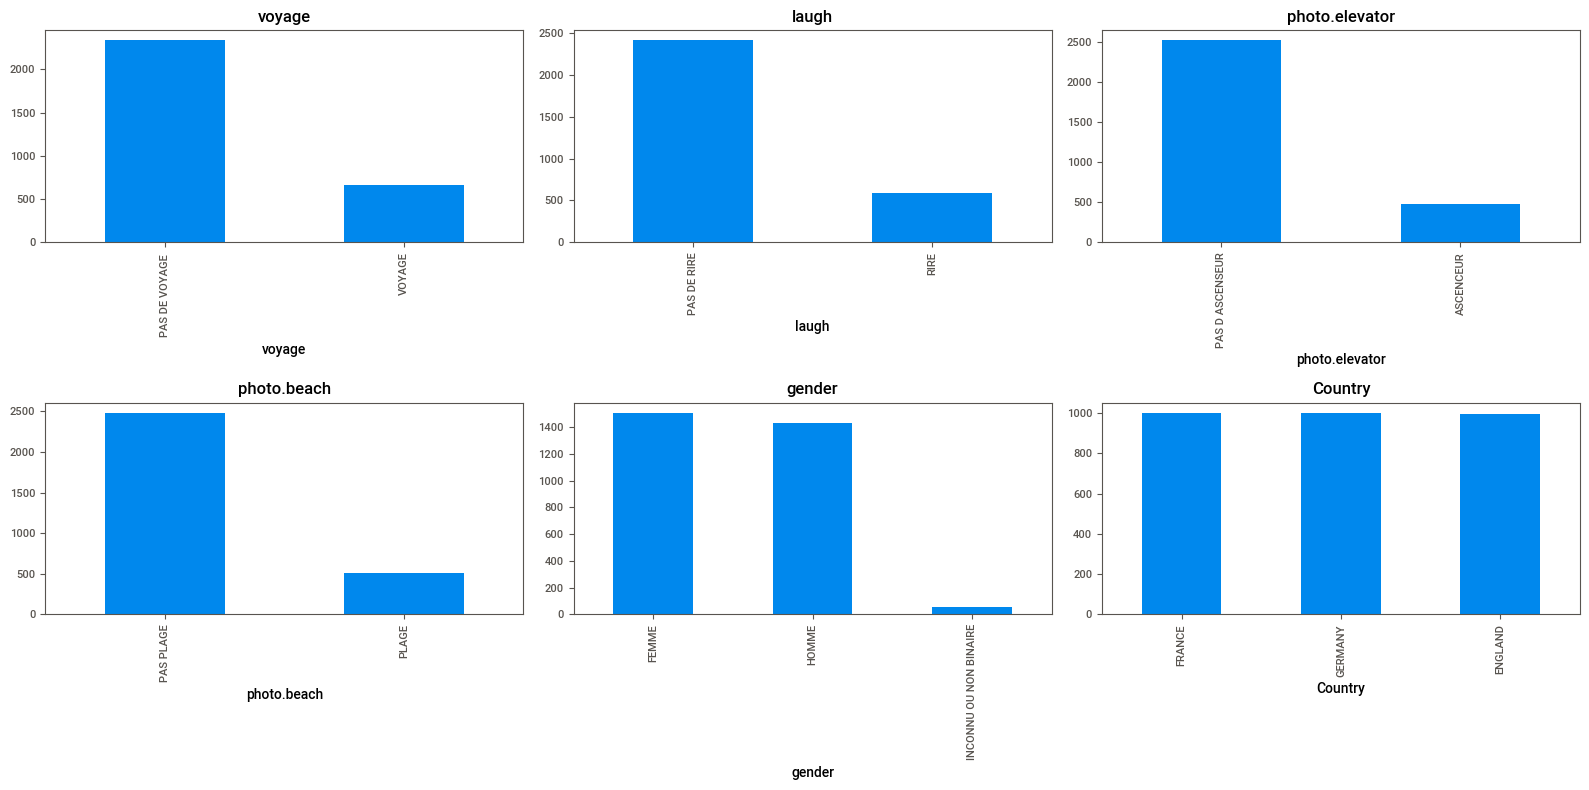

In [67]:
#une petit recap visuel du dataset 
fig = plt.figure(figsize=(16,8))
for i, name in enumerate(dating_acm.columns):
    ax = fig.add_subplot(2, 3, i + 1)  
    dating_acm[name].value_counts().plot.bar(ax=ax)
    ax.set(title=name)
    plt.tight_layout()

In [68]:
# Initialisation de l'ACM
acm = prince.MCA(n_components=2, random_state=42)
acm = acm.fit(dating_acm)

# Transformation des données
acm_df = acm.transform(dating_acm)


variables = acm.column_coordinates(dating_acm)
variables.index = variables.index.str.split('_').str[1] # enlevons la premiere partie de l' index pour n'avoir que les modalités sans les variables
print(variables)

e = acm.eigenvalues_
t = e.sum()
inertie = e/t

print("Inertie composante principale :", inertie)


                               0         1
PAS DE VOYAGE          -0.074065  0.116339
VOYAGE                  0.260062 -0.408498
PAS DE RIRE             0.044262  0.268276
RIRE                   -0.181950 -1.102812
ASCENCEUR              -1.220271 -0.234112
PAS D ASCENSEUR         0.233009  0.044703
PAS PLAGE              -0.292102  0.043715
PLAGE                   1.409461 -0.210936
FEMME                  -0.739975 -0.018088
HOMME                   0.744198 -0.086201
INCONNU OU NON BINAIRE  0.839701  2.601541
ENGLAND                 0.060141 -1.032710
FRANCE                 -0.042676  0.382110
GERMANY                -0.017182  0.646091
Inertie composante principale : [0.55147835 0.44852165]


Text(0.5, 1.0, ' Representation des modalites des variables du jeu de données dating en ACM')

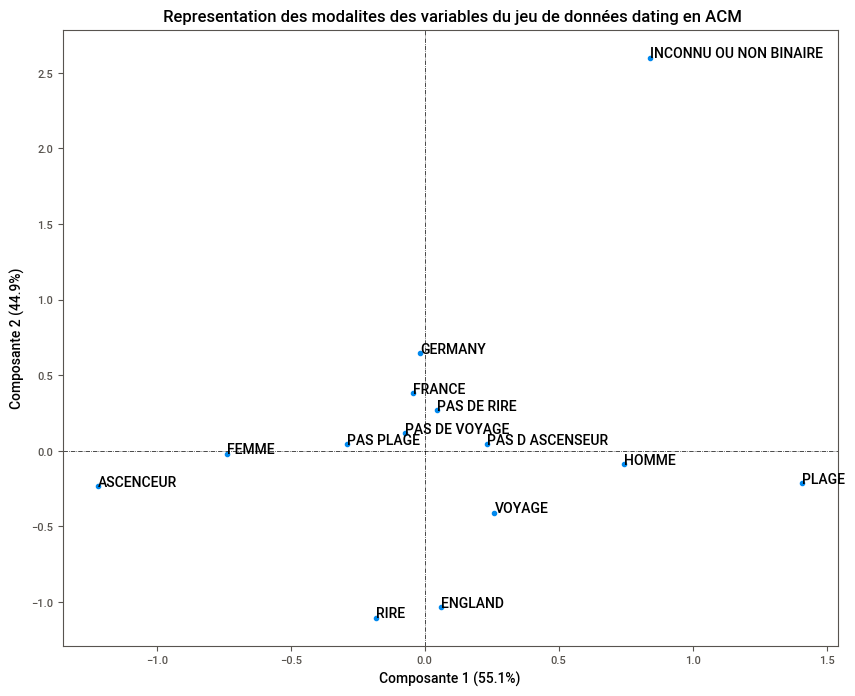

In [69]:
#visualisation :
plt.figure(figsize=(10, 8))
plt.axhline(0, color='black',linewidth=0.5, ls='-.')#ordonnée
plt.axvline(0, color='black',linewidth=0.5, ls='-.')#abscisse
#representation variables
plt.scatter(variables[0], variables[1])
#annotations
for i, var in enumerate(variables.index):
    plt.annotate(var, (variables[0][i], variables[1][i]))
plt.xlabel(f"Composante 1 ({round(inertie[0]*100,1)}%)")
plt.ylabel(f"Composante 2 ({round(inertie[1]*100,1)}%)")
plt.title(" Representation des modalites des variables du jeu de données dating en ACM")

## Projet 4 : Classification non supervisée par DBSCAN :

- Création du jeu de données moon :

<Axes: xlabel='abscisse', ylabel='ordonnees'>

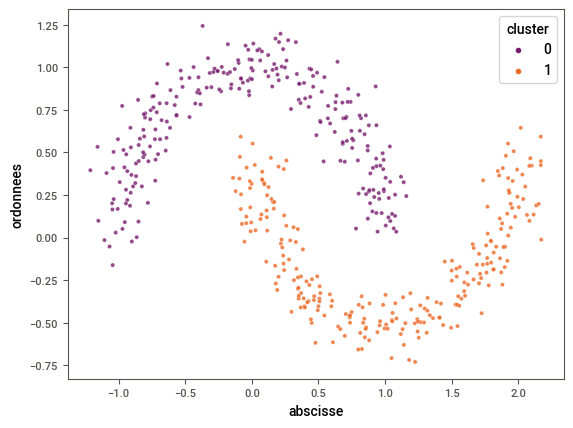

In [70]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
# nombre de donnée 500
#bruit pour avoir des données faible pour eviter une trop grande dispersion
#random state afin de pouvoir garantir une stablité du jeu de données a chaque utilisation

make_moon = pd.DataFrame(X, columns=['abscisse', 'ordonnees'])#creation d' un dataframe pour avoir une idées du jeu de données
make_moon['cluster'] = y
#visualisation
sns.scatterplot(data=make_moon, x='abscisse', y='ordonnees', hue='cluster', palette='inferno', alpha=0.8)

- Recherchons de hyperparametre optimaux. Nous rappelpns que le premier est l'eps qui definit la distance necessaire et maximale pour que deux points soient considérés comme dans le meme cluster et min_samples qui definit le nombre de voisins minimum en dessous duquel l'individus est considéré comme un bruit. Nous avons recuperer un code sur internet que nous avons adapté pour cet exercice (https://thinkingneuron.com/how-to-create-clusters-using-dbscan-in-python/)

In [71]:
#liste des parametres à tester
eps_list=np.arange(start=0.1, stop=0.9, step=0.01)
min_sample_list =np.arange(start=2, stop=5, step=1)

silhouette_scores_data=pd.DataFrame()


In [72]:

# Boucle sur les combinaisons d'hyperparamètres à tester 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X))) > 1):
            sil_score=silhouette_score(X, db.fit_predict(X))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data = pd.concat([silhouette_scores_data, pd.DataFrame(data=[[sil_score, trial_parameters]], columns=["score", "parameters"])], ignore_index=True)


# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)



score             parameters
47  0.327444  eps:0.2 min_sample :4

In [73]:
dbscan = DBSCAN(eps=0.2, min_samples=4)  
# implementons de le dbscans avec les hyperparametres que nous avons recherchés.

Text(0.5, 1.0, 'representation du jeu de données make_moons(DBSCAN)')

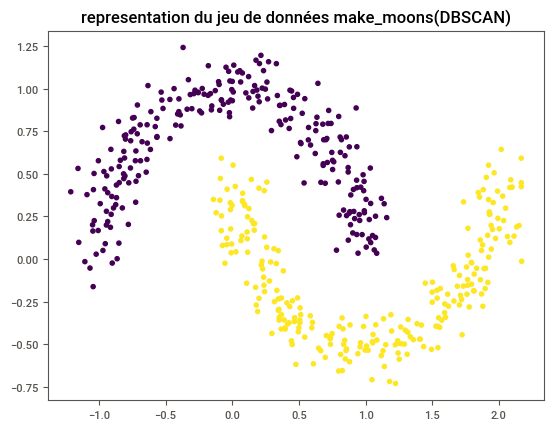

In [74]:
#visualisation
plt.scatter(x= X[:,0], y= X[:,1], c=y)
plt.title("representation du jeu de données make_moons(DBSCAN)")

2 - Faire un Kmeans et une CAH :

- kmeans :

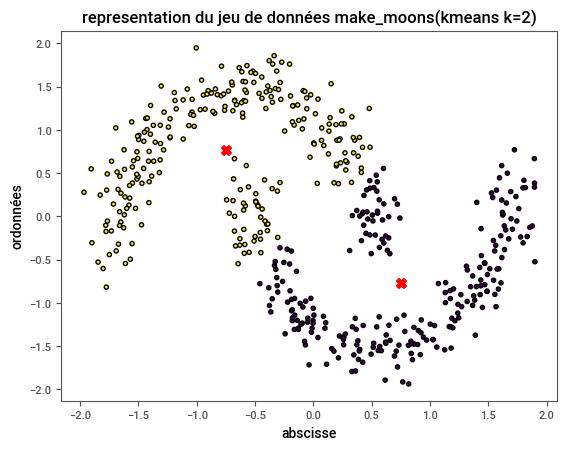

In [75]:
#données standardisées
x_st = StandardScaler().fit_transform(X)
#Implementation kmeans :
kmeans = KMeans(n_clusters=2) # On choisit le nombre de cluster definit par notre DBSCAN soit k=2
kmeans.fit(x_st)

plt.scatter(x_st[:, 0], x_st[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', marker='X', label='Centroids')

plt.title("representation du jeu de données make_moons(kmeans k=2)")
plt.xlabel("abscisse")
plt.ylabel("ordonnées")
plt.show()

- CAH :

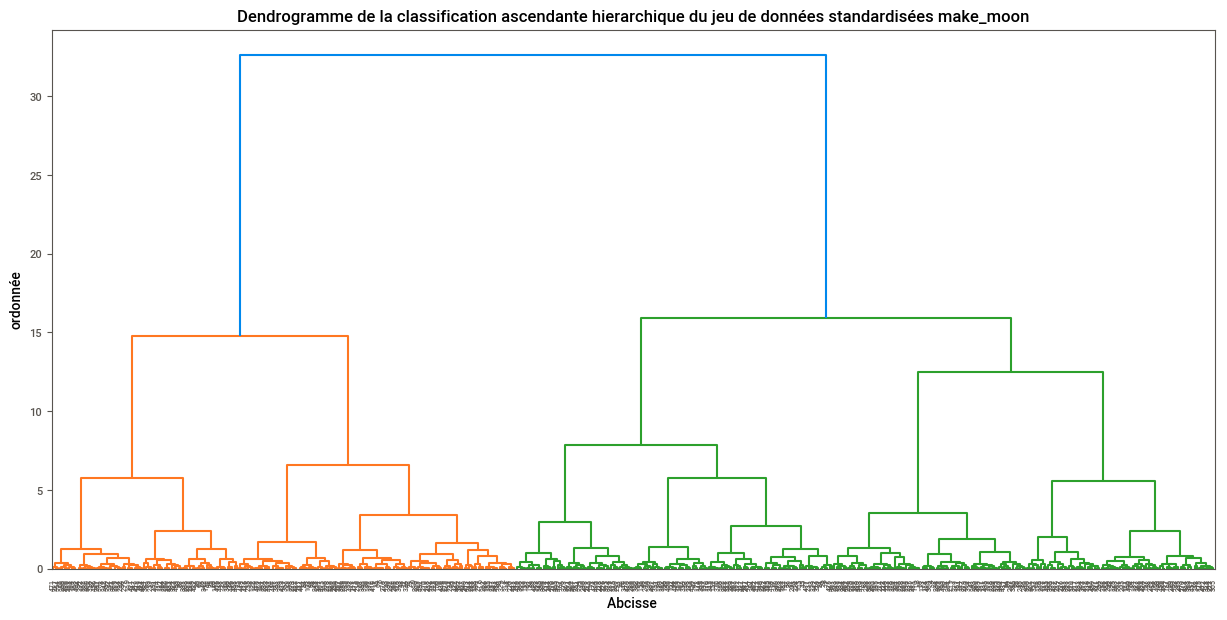

In [76]:
l= linkage(x_st, method='ward') #classification hierarchique ascendante

#visualisation dendogramme
plt.figure(figsize=(15, 7))
dendrogram(l)

plt.title("Dendrogramme de la classification ascendante hierarchique du jeu de données standardisées make_moon")
plt.xlabel("Abcisse ")
plt.ylabel("ordonnée")

plt.show()